# W2V

In [1]:
import numpy as np

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from IPython.display import clear_output
from functools import partial

import ipywidgets as widgets
import numpy as np

In [184]:
from scipy.spatial.distance import cosine

In [3]:
text = 'I swear to you gentlemen, that to be overly conscious is a sickness, a real, thorough sickness'
text = text.replace(',','').lower()
vocab = list(set(text.split()))

In [4]:
vocab_size = len(vocab)
vector_size = 2

In [5]:
vocab

['gentlemen',
 'be',
 'that',
 'overly',
 'a',
 'real',
 'sickness',
 'swear',
 'i',
 'conscious',
 'is',
 'you',
 'to',
 'thorough']

In [6]:
def init_weights(vocab_size,vector_size):
    '''
    '''
    W_0 = np.random.random((vocab_size,vector_size))
    W_1 = np.random.random((vector_size,vocab_size))
    
    return np.matrix(W_0), np.matrix(W_1)

## CBOW

In [7]:
text_list = text.split()

In [8]:
text_list

['i',
 'swear',
 'to',
 'you',
 'gentlemen',
 'that',
 'to',
 'be',
 'overly',
 'conscious',
 'is',
 'a',
 'sickness',
 'a',
 'real',
 'thorough',
 'sickness']

In [9]:
W_0 , W_1 = init_weights(vocab_size,vector_size)

In [10]:
W_1.shape

(2, 14)

In [11]:
W_0[0].shape

(1, 2)

In [12]:
np.matmul(W_1.T,W_0[0].T).shape

(14, 1)

In [13]:
def get_posterior(input_word,w_1):
    
    a = np.matmul(w_1.T,input_word.T)
    a = np.exp(a)
    a = a / sum(a)
    return a

In [14]:
w_input = text_list[0]
w_output = text_list[1]   
input_vocab_index = vocab.index(w_input)
output_vocab_index = vocab.index(w_output)
y_observed = np.zeros(len(vocab))

w_i = W_0[input_vocab_index] # input vector

h = w_i.T

y_hat = get_posterior(w_i,W_1) # equation 3

y_observed[output_vocab_index] = 1
                      
y_observed = np.reshape(y_observed,(len(vocab),1))

dE_du = y_hat - y_observed # equation 8

In [15]:
y_hat

matrix([[0.11403467],
        [0.06463619],
        [0.04626885],
        [0.06789308],
        [0.08774602],
        [0.10117176],
        [0.10116311],
        [0.08013436],
        [0.05799514],
        [0.06658592],
        [0.04025175],
        [0.05482895],
        [0.04175828],
        [0.07553192]])

In [16]:
dE_dw1 = np.matmul(dE_du,h.T)

## Example step through the network

### input word vector

In [17]:
w_i = W_0[input_vocab_index] # input vector
print("word indixw_i)

SyntaxError: EOL while scanning string literal (<ipython-input-17-79e0048431bc>, line 2)

In [18]:
from functools import partial

In [33]:
class Counter:
   def __init__(self, initial=0):
      self.value = initial

   def increment(self, amount=1):
      self.value += amount
      return self.value

   def __iter__(self, sentinal=False):
      return iter(self.increment, sentinal)

In [34]:
def display_single_step(counter,b):
    
    with out:
        clear_output()
        current_index = counter.value
        w_input = text_list[current_index]
        w_output = text_list[current_index + 1]   
        input_vocab_index = vocab.index(w_input)
        output_vocab_index = vocab.index(w_output)

        print("*---New iteration----*")
        print(" ")
        print("Context word = '{}'".format(w_input))
        print(" ")
        print("Target word = '{}''".format(w_output))
        print(" ")
        w_i = W_0[input_vocab_index] # input vector
        print("Input vector {}".format(str(w_i)))
        print(" ")
        h = w_i.T
        print("Hidden {}".format(str(h)))
        print(" ")
        y_hat = get_posterior(w_i,W_1) # equation 3
        print("Y_hat {}".format(str(y_hat)))
        print(" ")
        y_observed = np.zeros(len(vocab))
        y_observed[output_vocab_index] = 1

        y_observed = np.reshape(y_observed,(len(vocab),1))
        print("Y observed {}".format(str(y_observed)))
        print(" ")
        dE_du = y_hat - y_observed # equation 8
        print("de_du {}".format(str(dE_du)))
        counter.increment()
        

In [35]:
out = widgets.Output()
display(out)

Output()

In [36]:
counter = Counter()
w = widgets.Button(description='Step')
w.on_click(partial(display_single_step, counter))
display(w)

Button(description='Step', style=ButtonStyle())

In [37]:
def run_simple_cbow(iters,text,vector_size):
    '''
        run through vocab the number of iters
        for each word in text:
            y = predict_next_word
            get the loss
            update the network
    '''
    
    text_list = text.split()
    text = text.replace(',','').lower()
    vocab = list(set(text.split()))
    vocab_size = len(vocab)
    alpha = 0.005 # learning rate
    
    W_0, W_1 = init_weights(vocab_size,vector_size)
    
    for _ in range(iters): # one iteration is a full walk through the tex
        
        for i in range(len(text_list[:-1])): # go up to the last word. No wrapping
            
            # for each input word we are going to make a prediction
            # for each word in the vocabulary
            prediction_vector = [] # 1 x vocab size
            gradient_vector_w = [] # gradient for 'input' weights. should be a 1 x vector size
            gradient_vector_w_2 = [] # gradient for output weights. 1 x vector size
            for j in range(vocab_size):
                
                w_input = text_list[i]
                w_output = text_list[i + 1]   
                input_vocab_index = vocab.index(w_input)
                output_vocab_index = vocab.index(w_output)
                y_observed = np.zeros(len(vocab))

                w_i = W_0[input_vocab_index] # input vector

                h = w_i.T # hidden layer equation 1

                y_hat = get_posterior(w_i,W_1) # equation 2,3 in one step

                y_observed[output_vocab_index] = 1

                dE_du = y_hat - y_observed # equation 8 also e_j 
                
                e_j = dE_du # for clarity matching notation to Rong

                dE_dw1 = alpha*dE_du*h # equation 9
                
                gradien_vector_w_2[j] = dE_dw1
                
                # now to update the input weights
                # equation 12 tells us that the change in the error w.r.t 
                # a single index of the hidden layer results in the sum of the error
                # for the current output j times the ith index for each word in the 
                # output weigths. como? que? makes sense in my mind
                
                dE_dW = np.zeros(vector_size) # equation 15
                for j_hidden in range(vector_size): # loop over each index in hidden layer
                    dE_dh_i = None
                    for j_2 in range(vocab_size):
                        dE_dh_i += e_j*W_1[j_hidden][j_2]
                        
                    dE_dW[j_hidden] = dE_dh_i
                    
                prediction_vector[j] = y_hat
                gradient_vector_w[j] = dE_dw1
                gradient_vector_w_2 = dE_dW
                
            # ok I think we can update now
            W_1[j]
                
                
                
            
            
        
        
        

In [43]:
import seaborn as sns; sns.set()

In [44]:
import matplotlib.pyplot as plt

In [45]:
%matplotlib inline

In [46]:
import numpy as np
import pandas as pd

In [224]:
def create_mat_cosine_pairs(mat):

    row_shape,col_shape = mat.shape

    cosine_matrix = np.zeros((mat.shape[0],mat.shape[0]))
    for i in range(row_shape):
        for j in range(row_shape):
            cosine_distance = abs(cosine(mat[i],mat[j]))

            if np.isnan(cosine_distance):
                cosine_matrix[i][j] = 0

            else:
                cosine_matrix[i][j] = cosine_distance

    return cosine_matrix

In [ ]:
def matrix_diff(mat1, mat2):
    cosine_mat1 = create_mat_cosine_pairs(mat1)
    cosine_mat2 = create_mat_cosine_pairs(mat2)

    row_shape, col_shape = mat1.shape

    tot_score = 0
    for i in range(row_shape):
        for j in range(row_shape):
            dist = abs(cosine_mat1[i][j] - cosine_mat2[i][j])
            tot_score += dist

    tot_score = float(tot_score) / len(mat1) ** 2

    return tot_score

In [215]:
def make_ortho_compare_matrix(X,Y):
    '''
        make a row v row ortho comparison
        of X on Y
    '''
    
    assert X.shape == Y.T.shape
    
    ortho_X_Y = np.zeros((X.shape[0],Y.shape[1]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[1]):
            dot_prod = np.dot(X[i],Y.T[j])
            ortho_X_Y[i][j] = dot_prod
            
    return ortho_X_Y

In [211]:
def make_ortho_matrix(X):
    '''
        Takes in a matrix n x m
        and returns a n x m matrix
        or the dot product of each row
        of the matrix on the rest of the rows
        of the matrix
    '''
    
    ortho_X = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dot_prod = np.dot(X[i],X[j])
            ortho_X[i][j] = dot_prod
            
    return ortho_X
        
    

In [281]:
conditional_prob = np.load("/Users/befeltingu/NeuralNetworks/NLP/data/conditional_prob_mat.npy")
conditional_df = pd.DataFrame(conditional_prob,columns=vocab)

[Text(0, 0.5, 'almost'),
 Text(0, 1.5, 'ate'),
 Text(0, 2.5, 'cat'),
 Text(0, 3.5, 'dog'),
 Text(0, 4.5, 'jumped'),
 Text(0, 5.5, 'really'),
 Text(0, 6.5, 'the')]

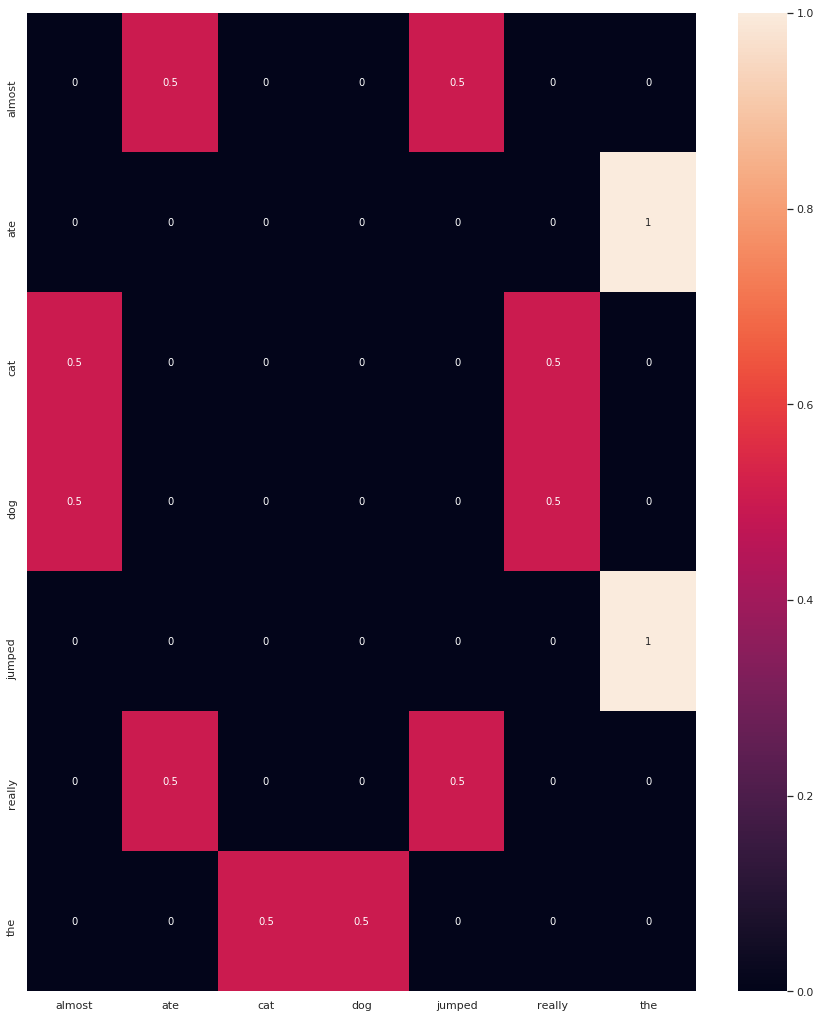

In [282]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(conditional_df,annot=True)
ax.set_xticklabels(vocab)
ax.set_yticklabels(vocab)

In [271]:
cbow_trans_matrix = np.load("/Users/befeltingu/NeuralNetworks/NLP/data/cbow_simple_trans.npy")
cbow_W0 = np.load("/Users/befeltingu/NeuralNetworks/NLP/data/cbow_W0.npy")
cbow_W1 = np.load("/Users/befeltingu/NeuralNetworks/NLP/data/cbow_W1.npy")

In [272]:
dot_W0_W1 = np.dot(cbow_W0,cbow_W1)
dot_W0_W1_df = pd.DataFrame(dot_W0_W1,columns=vocab)

In [273]:
ortho_W0_W1 = make_ortho_compare_matrix(cbow_W0,cbow_W1)
ortho_W0_W1_df = pd.DataFrame(ortho_W0_W1,columns=vocab)

In [274]:
#text = 'I swear to you gentlemen, that to be overly conscious is a sickness, a real, thorough sickness'
text = text = '''
        The cat really jumped
        The cat really ate
        The cat almost jumped
        The cat almost ate
        The dog really jumped
        The dog really ate
        The dog almost jumped
        The dog almost ate
    '''
text = text.replace(',', '').lower()
text_list = text.split()
vocab = sorted(list(set(text_list)))

In [275]:
vocab

['almost', 'ate', 'cat', 'dog', 'jumped', 'really', 'the']

In [276]:
cbow_df = pd.DataFrame(cbow_trans_matrix,columns=vocab)

In [277]:
cbow_ortho_matrix = make_ortho_matrix(cbow_W0)
cbow_ortho_df = pd.DataFrame(cbow_ortho_matrix,columns=vocab)

[Text(0, 0.5, 'almost'),
 Text(0, 1.5, 'ate'),
 Text(0, 2.5, 'cat'),
 Text(0, 3.5, 'dog'),
 Text(0, 4.5, 'jumped'),
 Text(0, 5.5, 'really'),
 Text(0, 6.5, 'the')]

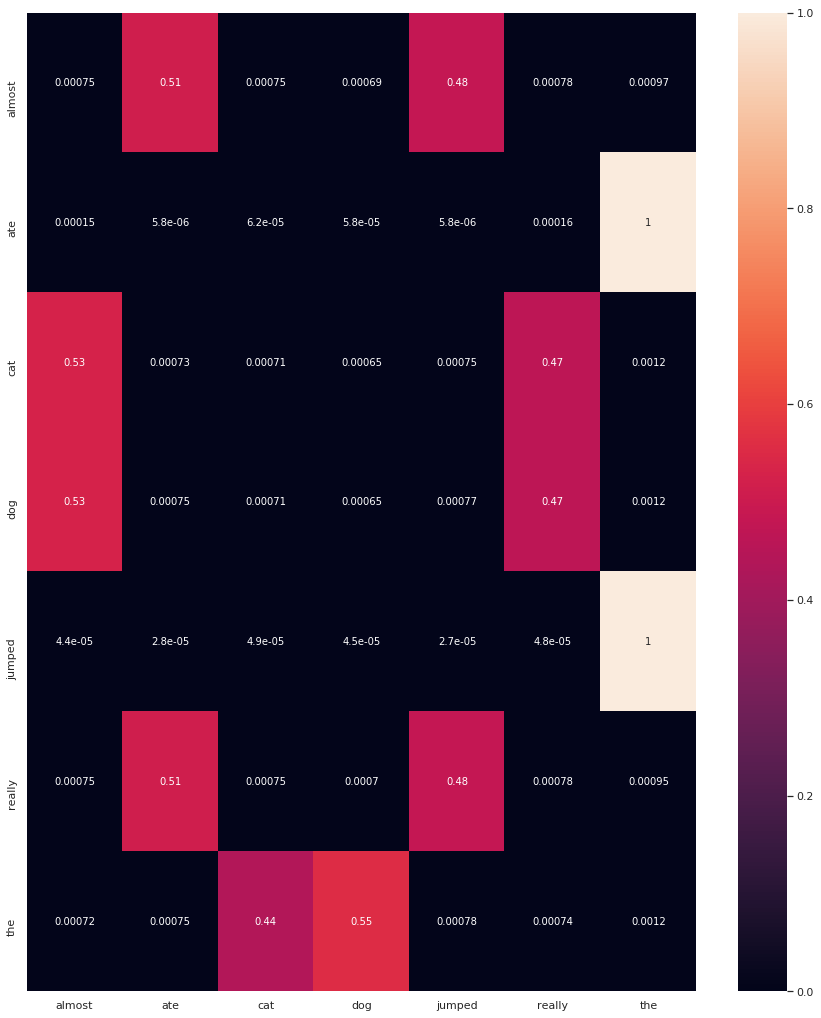

In [278]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(cbow_df,annot=True)
ax.set_xticklabels(vocab)
ax.set_yticklabels(vocab)

## CBOW Cosine distance matrix

In [279]:
cosine_mat_W0 = create_mat_cosine_pairs(cbow_W0)
cosine_W0_df = pd.DataFrame(cosine_mat_W0,columns=vocab)

[Text(0, 0.5, 'almost'),
 Text(0, 1.5, 'ate'),
 Text(0, 2.5, 'cat'),
 Text(0, 3.5, 'dog'),
 Text(0, 4.5, 'jumped'),
 Text(0, 5.5, 'really'),
 Text(0, 6.5, 'the')]

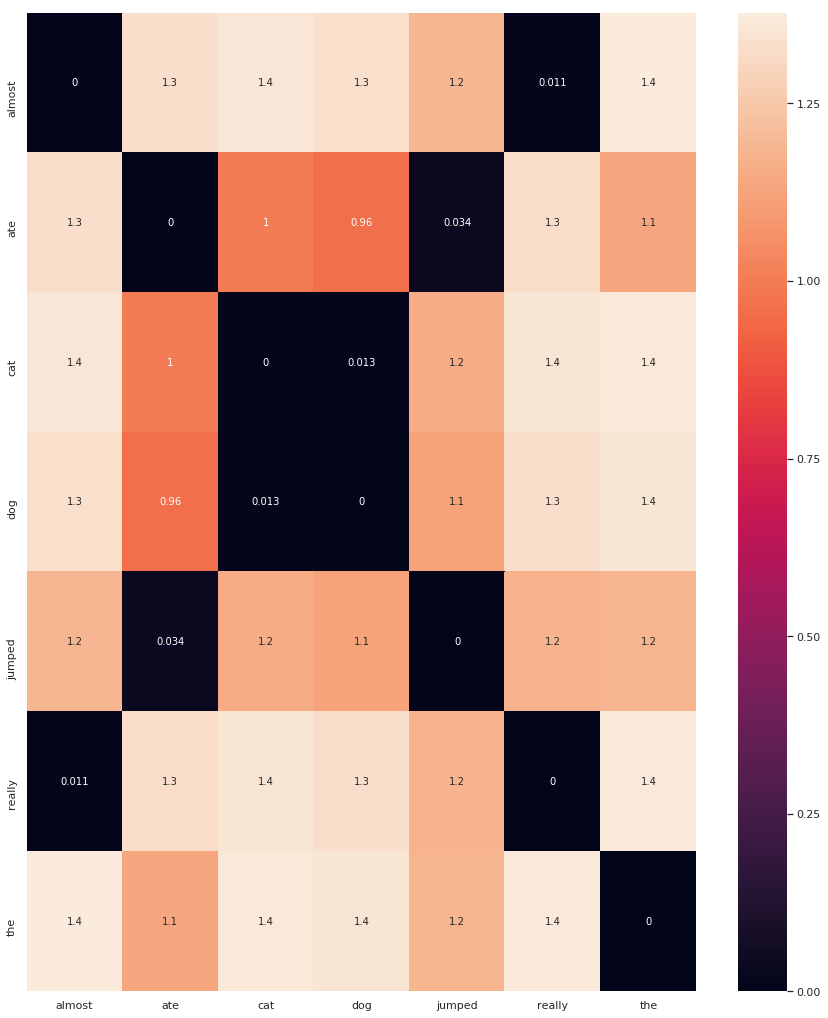

In [280]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(cosine_W0_df,annot=True)
ax.set_xticklabels(vocab)
ax.set_yticklabels(vocab)

## Doted matrix

[Text(0, 0.5, 'a'),
 Text(0, 1.5, 'be'),
 Text(0, 2.5, 'conscious'),
 Text(0, 3.5, 'gentlemen'),
 Text(0, 4.5, 'i'),
 Text(0, 5.5, 'is'),
 Text(0, 6.5, 'overly'),
 Text(0, 7.5, 'real'),
 Text(0, 8.5, 'sickness'),
 Text(0, 9.5, 'swear'),
 Text(0, 10.5, 'that'),
 Text(0, 11.5, 'thorough'),
 Text(0, 12.5, 'to'),
 Text(0, 13.5, 'you')]

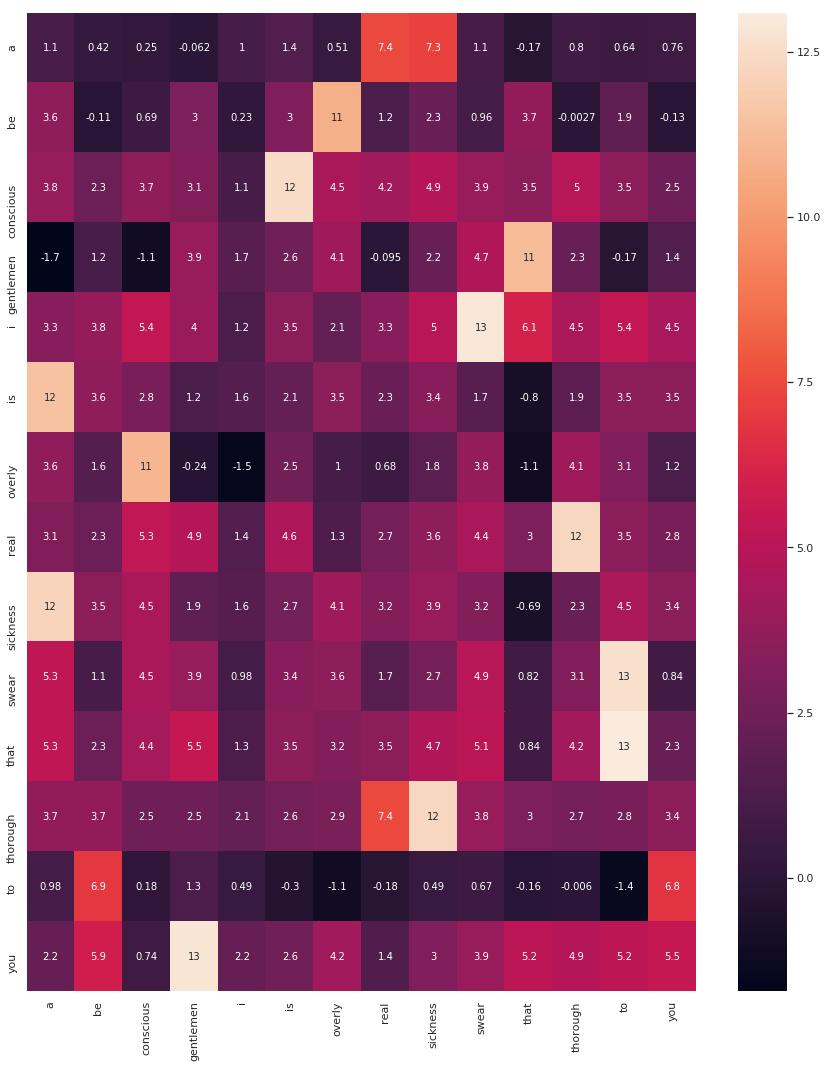

In [190]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(dot_W0_W1_df,annot=True)
ax.set_xticklabels(vocab)
ax.set_yticklabels(vocab)

[Text(0, 0.5, 'a'),
 Text(0, 1.5, 'be'),
 Text(0, 2.5, 'conscious'),
 Text(0, 3.5, 'gentlemen'),
 Text(0, 4.5, 'i'),
 Text(0, 5.5, 'is'),
 Text(0, 6.5, 'overly'),
 Text(0, 7.5, 'real'),
 Text(0, 8.5, 'sickness'),
 Text(0, 9.5, 'swear'),
 Text(0, 10.5, 'that'),
 Text(0, 11.5, 'thorough'),
 Text(0, 12.5, 'to'),
 Text(0, 13.5, 'you')]

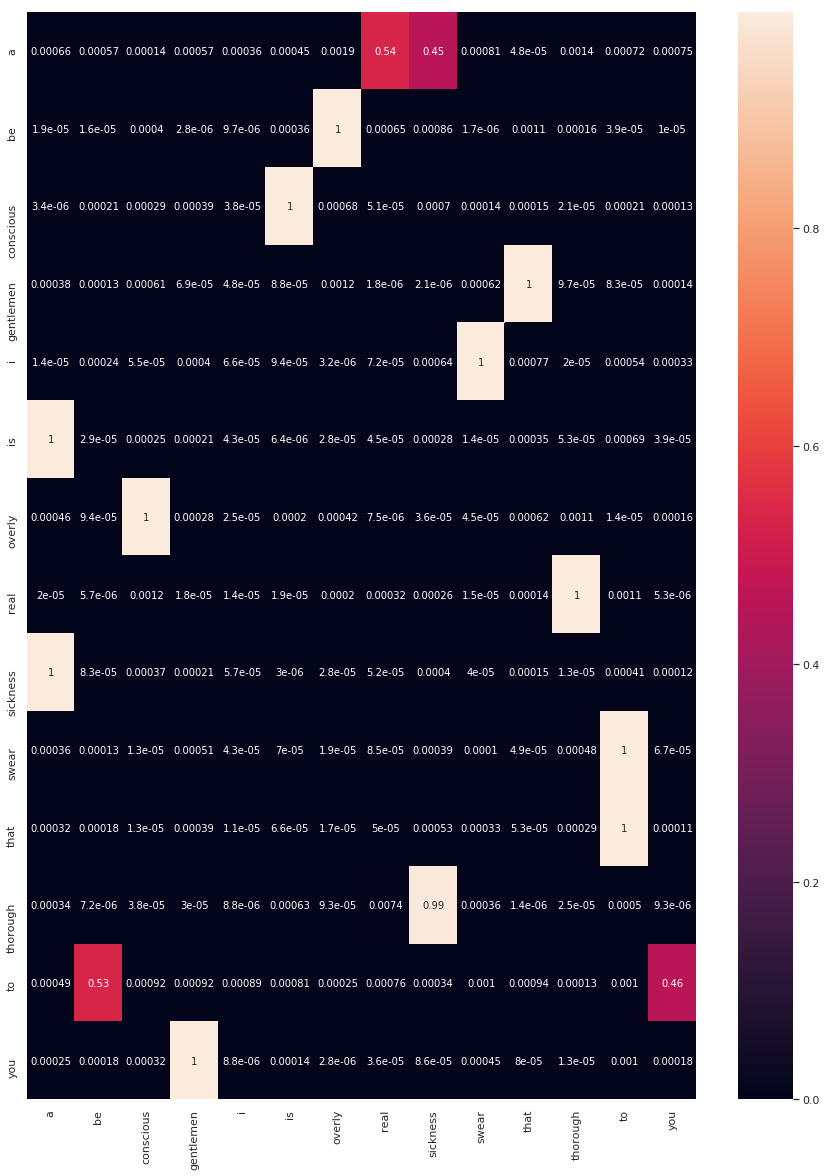

In [171]:
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(cbow_df,annot=True)
ax.set_xticklabels(vocab)
ax.set_yticklabels(vocab)

## Simple Logistic regression

In [391]:
logistic_trans_matrix = np.load("/Users/befeltingu/NeuralNetworks/NLP/data/logistic_trans.npy")
logit_X = np.load("/Users/befeltingu/NeuralNetworks/NLP/data/logit_X.npy")
logit_Beta = np.load("/Users/befeltingu/NeuralNetworks/NLP/data/logit_Beta.npy")

In [392]:
logistic_df = pd.DataFrame(logistic_trans_matrix,columns=vocab)

[Text(0, 0.5, 'almost'),
 Text(0, 1.5, 'ate'),
 Text(0, 2.5, 'cat'),
 Text(0, 3.5, 'dog'),
 Text(0, 4.5, 'jumped'),
 Text(0, 5.5, 'really'),
 Text(0, 6.5, 'the')]

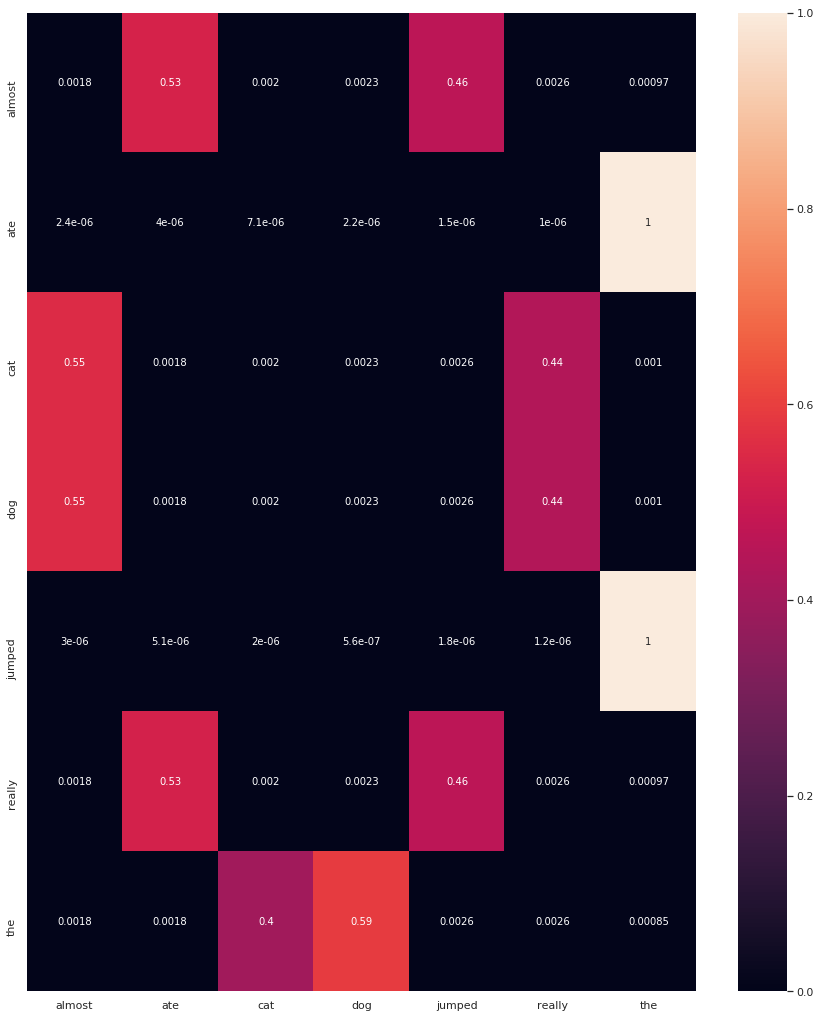

In [393]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(logistic_df,annot=True)
ax.set_xticklabels(vocab)
ax.set_yticklabels(vocab)

## Simple Logistic Cosine Distance

In [394]:
dot_W0_W1 = np.dot(cbow_W0,cbow_W1)
dot_W0_W1_df = pd.DataFrame(dot_W0_W1,columns=vocab)

In [395]:
logit_cosine_X = create_mat_cosine_pairs(logit_X)
logit_cosine_df = pd.DataFrame(logit_cosine_X,columns=vocab)

[Text(0, 0.5, 'almost'),
 Text(0, 1.5, 'ate'),
 Text(0, 2.5, 'cat'),
 Text(0, 3.5, 'dog'),
 Text(0, 4.5, 'jumped'),
 Text(0, 5.5, 'really'),
 Text(0, 6.5, 'the')]

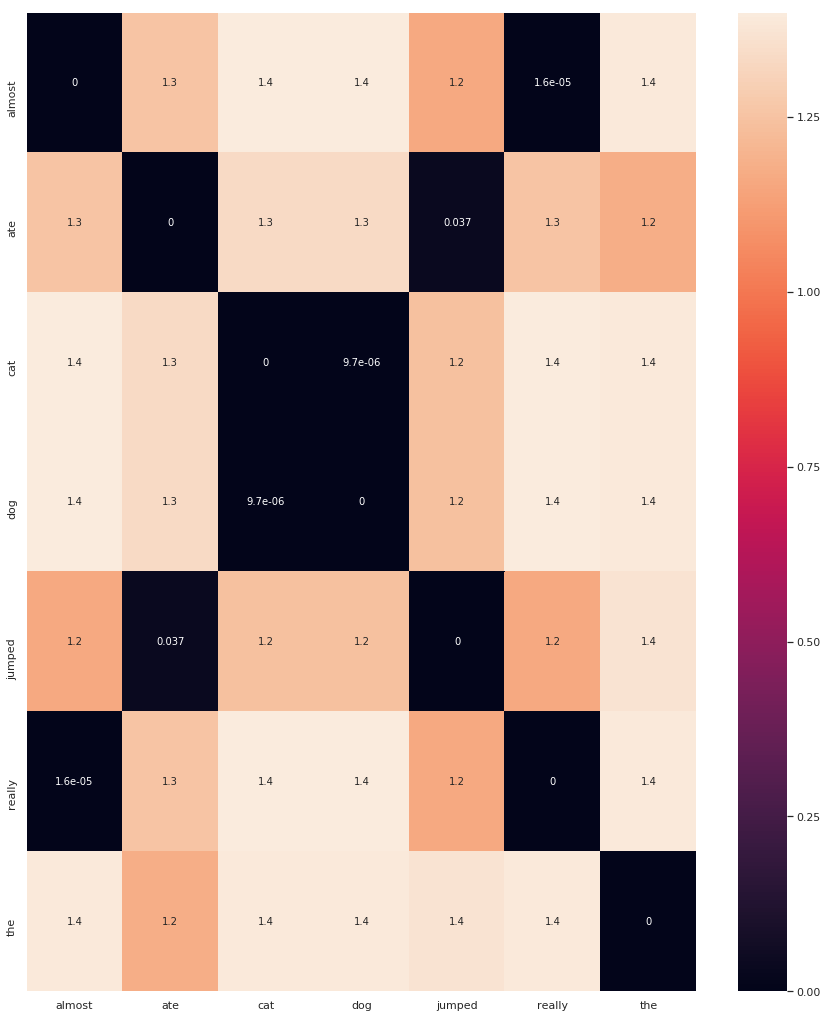

In [396]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(logit_cosine_df,annot=True)
ax.set_xticklabels(vocab)
ax.set_yticklabels(vocab)